# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


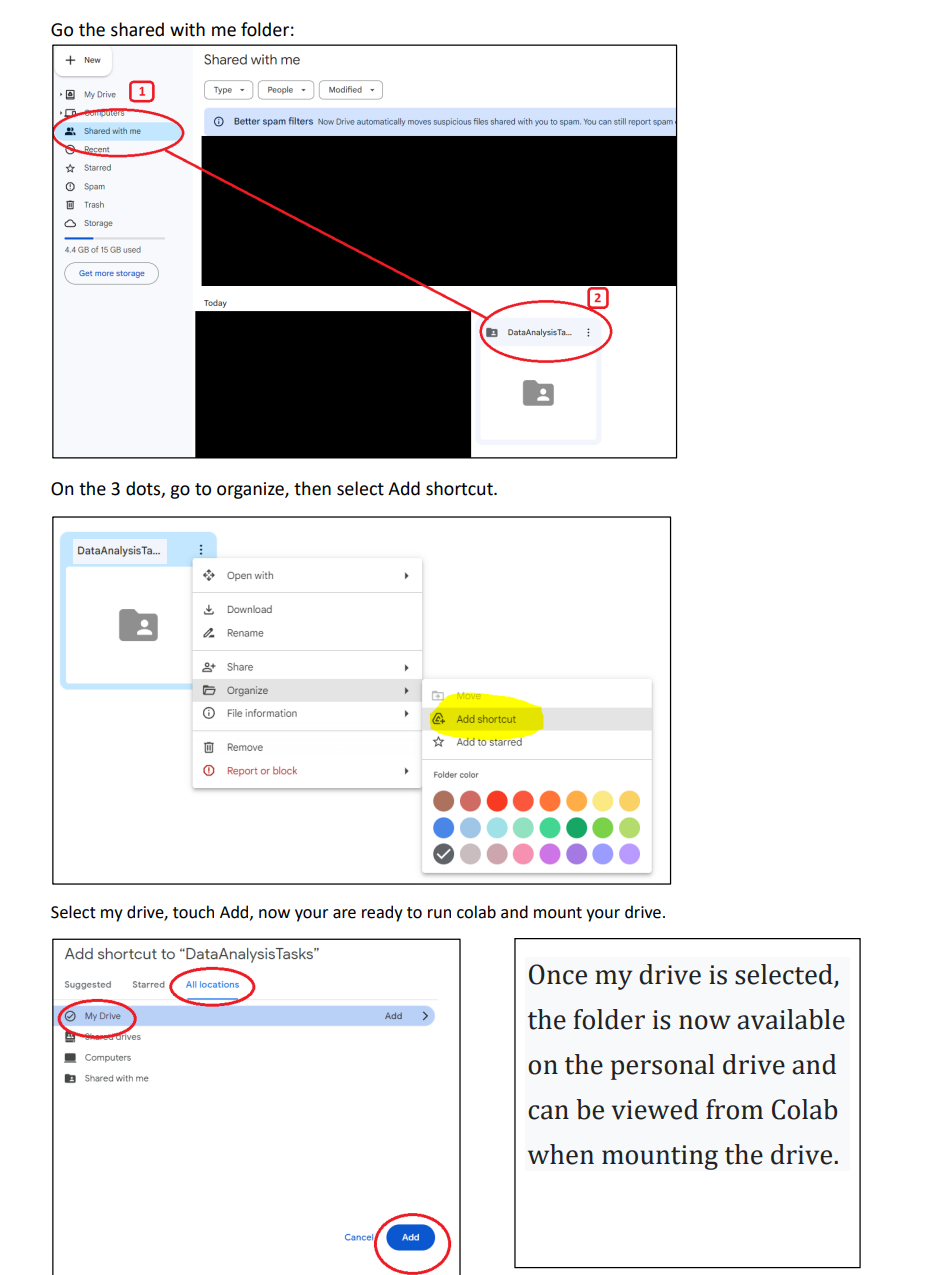

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








<ipython-input-3-62d320fcd860>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_10_teams_1920_1960.index, rotation=45)
<ipython-input-3-62d320fcd860>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_10_teams_1964_2022.index, rotation=45)


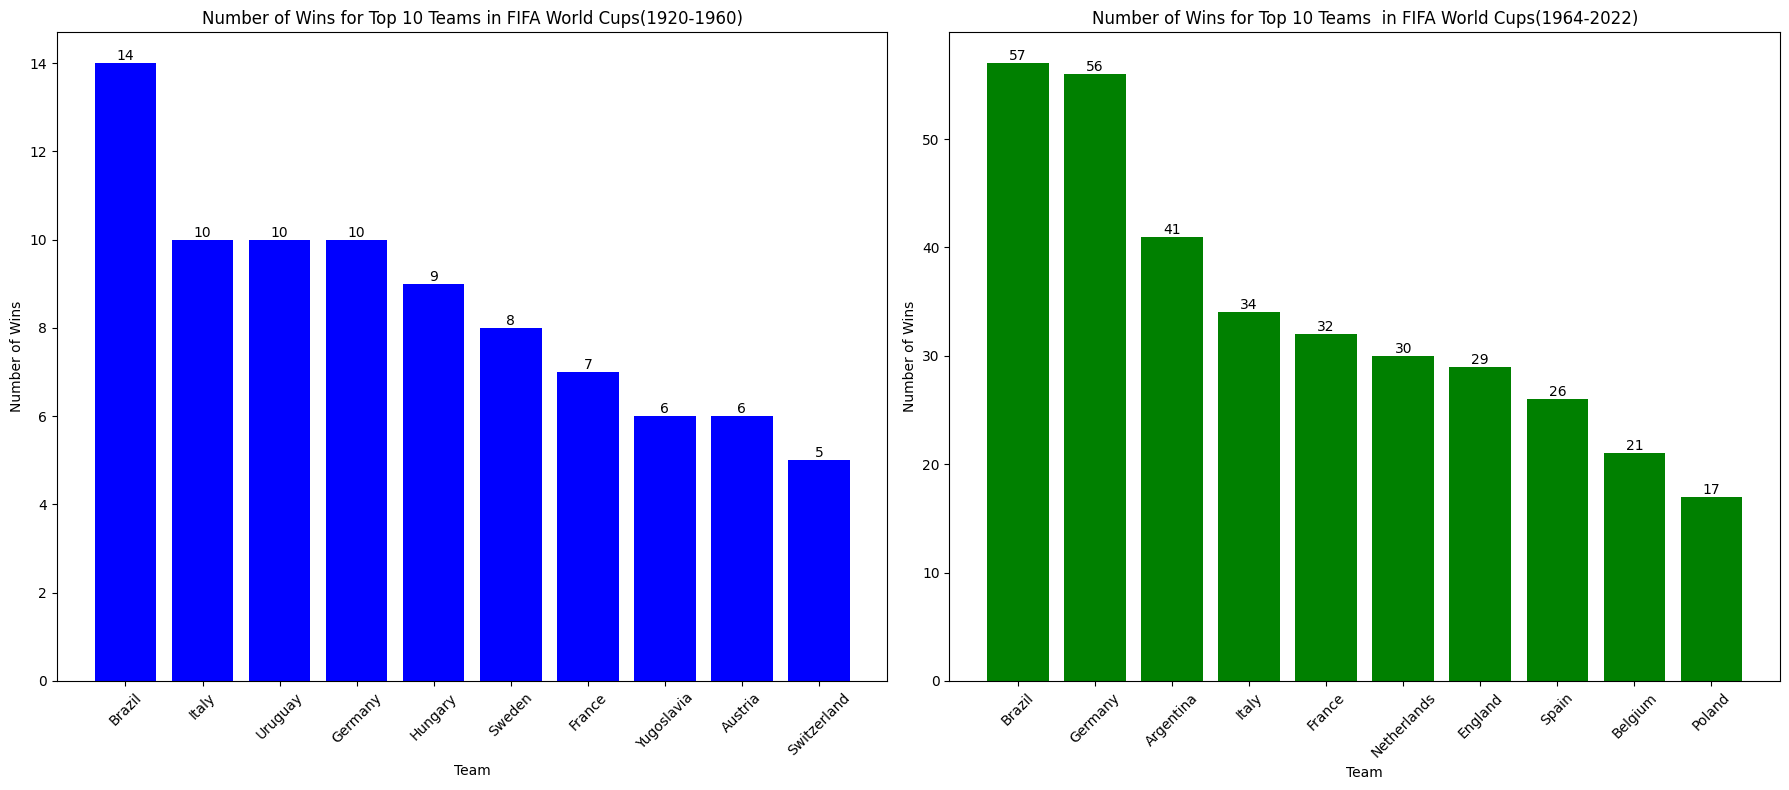

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv")

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the years 1920-1960 and 1964-2022
filtered_df_1920_1960 = df[(df['date'].dt.year >= 1920) & (df['date'].dt.year <= 1960)]
filtered_df_1964_2022 = df[(df['date'].dt.year >= 1964) & (df['date'].dt.year <= 2022)]

# Filter data for FIFA WORLD CUP
filtered_df_1920_1960 = filtered_df_1920_1960[filtered_df_1920_1960["tournament"] == "FIFA World Cup"]
filtered_df_1964_2022 = filtered_df_1964_2022[filtered_df_1964_2022["tournament"] == "FIFA World Cup"]

# Count the number of wins for each team as home or away team in both durations
home_win_counts_1920_1960 = filtered_df_1920_1960[filtered_df_1920_1960["home_score"] > filtered_df_1920_1960["away_score"]]["home_team"].value_counts()
away_win_counts_1920_1960 = filtered_df_1920_1960[filtered_df_1920_1960["away_score"] > filtered_df_1920_1960["home_score"]]["away_team"].value_counts()

home_win_counts_1964_2022 = filtered_df_1964_2022[filtered_df_1964_2022["home_score"] > filtered_df_1964_2022["away_score"]]["home_team"].value_counts()
away_win_counts_1964_2022 = filtered_df_1964_2022[filtered_df_1964_2022["away_score"] > filtered_df_1964_2022["home_score"]]["away_team"].value_counts()

# Combine home and away wins for each team
total_win_counts_1920_1960 = home_win_counts_1920_1960.add(away_win_counts_1920_1960, fill_value=0)
total_win_counts_1964_2022 = home_win_counts_1964_2022.add(away_win_counts_1964_2022, fill_value=0)

# Get the top 10 teams with the most wins in both durations
top_10_teams_1920_1960 = total_win_counts_1920_1960.sort_values(ascending=False).head(10)
top_10_teams_1964_2022 = total_win_counts_1964_2022.sort_values(ascending=False).head(10)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot for the years 1920-1960
bars_1920_1960 = axs[0].bar(top_10_teams_1920_1960.index, top_10_teams_1920_1960.values, color='blue')

# Set Title and labels
axs[0].set_title("Number of Wins for Top 10 Teams in FIFA World Cups(1920-1960)")
axs[0].set_xlabel("Team")
axs[0].set_ylabel("Number of Wins")
axs[0].set_xticklabels(top_10_teams_1920_1960.index, rotation=45)

# Plot for the years 1964-2022
bars_1964_2022 = axs[1].bar(top_10_teams_1964_2022.index, top_10_teams_1964_2022.values, color='green')

# Set Title and labels
axs[1].set_title("Number of Wins for Top 10 Teams  in FIFA World Cups(1964-2022)")
axs[1].set_xlabel("Team")
axs[1].set_ylabel("Number of Wins")
axs[1].set_xticklabels(top_10_teams_1964_2022.index, rotation=45)

# Add values on top of each bar in the first subplot
for bar in bars_1920_1960:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black', fontsize=10)

# Add values on top of each bar in the second subplot
for bar in bars_1964_2022:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()